In [13]:
# Librerie
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


/Users/cesar/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
# Cartelle Input/Output
dir_df = os.path.join(os.path.abspath(''),'stg')
dir_out = os.path.join(os.path.abspath(''),'output')

In [15]:
df_g5_n_filename = r'df_g5_nord.pkl'
df_g5_n_fullpath = os.path.join(dir_df, df_g5_n_filename)
df_g5_nord = pd.read_pickle(df_g5_n_fullpath)

df_g5_s_filename = r'df_g5_sud.pkl'
df_g5_s_fullpath = os.path.join(dir_df, df_g5_s_filename)
df_g5_sud = pd.read_pickle(df_g5_s_fullpath)

In [16]:
# Setto indice la Anno
df_g5_sud = df_g5_sud.set_index(['Anno'])
df_g5_nord = df_g5_nord.set_index(['Anno'])

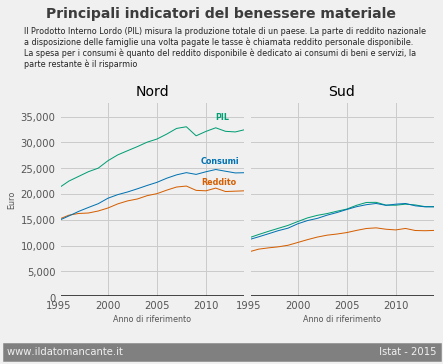

In [94]:
style.use('fivethirtyeight')
import matplotlib.ticker as mtick
# Colorblind-friendly colors
colors = [[0,158/255,115/255], [213/255,94/255,0], [0,114/255,178/255]]

fig, axes = plt.subplots(nrows=1, ncols=2)

tp1 = df_g5_nord.plot(
                kind='line',
                legend = False,
                ylim=(0,38000),
                ax=axes[0],
                figsize = (6,4),
                color = colors,
                linewidth=1
                    )

tp1.tick_params(axis = 'both', which = 'major', labelsize = 10)

tp1.set_ylabel('Euro',fontsize=8)
tp1.set_xlabel('Anno di riferimento',fontsize=8)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
tp1.yaxis.set_major_formatter(tick)

tp1.axhline(y = 0, color = 'black', linewidth = 4, alpha = 0.7)
#tp1.axvline(x = 0, color = 'black', linewidth = 5, alpha = 0.7)

# Add colored labels
tp1.text(x = 16, y = 34500, s = 'PIL', color = colors[0], weight = 'bold', rotation = 0,
              backgroundcolor = 'None',fontsize = 8)
tp1.text(x = 14.5, y = 21800, s = 'Reddito', color = colors[1], weight = 'bold', rotation = 0,
              backgroundcolor = 'None',fontsize = 8)
tp1.text(x = 14.5, y = 26000, s = 'Consumi', color = colors[2], weight = 'bold', rotation = 0,
              backgroundcolor = 'None',fontsize = 8)

axes[0].set_title('Nord',fontsize=14)
axes[1].set_title('Sud',fontsize=14)

tp2 = df_g5_sud.plot(kind='line',
                legend = False,
                ylim=(0,38000),
                ax=axes[1],
                figsize = (6,4),
                color = colors,
                linewidth=1
                    )

#tp2.grid(True)
tp2.set_yticklabels([])
tp2.set_xlabel('Anno di riferimento',fontsize=8)
# tp2.legend(loc='upper right',prop={'size':8})
tp2.tick_params(axis = 'both', which = 'major', labelsize = 10)

tp2.axhline(y = 0, color = 'black', linewidth = 4, alpha = 0.7)

plt.subplots_adjust(hspace=0.0, wspace=0.02, bottom=0.2)

# Adding a title and a subtitle
fig.text(x = 0.05, y = 1.17, s = "Principali indicatori del benessere materiale",
               fontsize = 14, weight = 'bold', alpha = .75)
fig.text(x = 0, y = 1, 
               s = "Il Prodotto Interno Lordo (PIL) misura la produzione totale di un paese. La parte di reddito nazionale \na disposizione delle famiglie una volta pagate le tasse è chiamata reddito personale disponibile. \nLa spesa per i consumi è quanto del reddito disponibile è dedicato ai consumi di beni e servizi, la \nparte restante è il risparmio",
              fontsize = 8, alpha = .85)

text = fig.text(x = -0.04, y = -0.0005,     
    s = 'www.ildatomancante.it                                                                                  Istat - 2015',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

fig.savefig(os.path.join(dir_out,'G5_Reddito_pro_capite.png'), format='png', dpi=300,bbox_inches='tight')
fig.savefig(os.path.join(dir_out,'G5_Reddito_pro_capite.svg'), format='svg', dpi=300,bbox_inches='tight')